# Sınıflandırma (Classification) Türleri

Sınıflandırma (Classification), denetimli öğrenmenin (supervised learning) temel problemlerinden biridir. 

Amacı, bir girdi verisinin (input) önceden tanımlanmış kategorilerden (sınıflardan) birine atamaktır. Örneğin: bir e-postanın "spam" veya "spam değil", bir tümörün "iyi huylu" veya "kötü huylu" olarak sınıflandırabiliriz.

<h4>Temel Kavramlar</h4>

* **Sınıf (Class/Label):** Veri noktalarının atanabileceği kategori (örn: Spam, Spam Değil)
* **Özellik (Feature):** Veriyi ve sınıfı tanımlamak için kullanılan değişkenler (örn: E-posta başlığı uzunluğu, içerdiği kelimeler)
* **Model (Classifier):** Özellikler ile sınıf etiketleri arasındaki ilişkiyi öğrenen matematiksel fonksiyon
* **Eğitim (Training):** Modelin, etiketli veriler üzerinden bu ilişkiyi öğrenme süreci.
* **Tahmin (Prediction/Inference):** Eğitilmiş modelin, yeni görüşmemiş verilerin sınıfını tahmin etmesi.

## 1. Lojistik Regresyon - (Logistic Regression)

Lojistik Regresyon (Logistic Regression), sınıflandırma problemlerinde kullanılan istatistiksel ve makine öğrenmesini algoritmasıdır. Özellikle **ikili (binary) sınıflandırma** ("evet/hayır", "1/0") için yaygın olarak kullanılır.

* Lojistik Regresyon, bağımlı değişkenin **(hedef)** olasılığını tahmin etmek için Sigmoid fonksiyonunu kullanır.
* Doğrusal regresyondan farklı olarak, çıktı bir olasılıktır. (0 ile 1 arasında).

Denklem:

$$
\sigma (x) = \frac {1} {1 + e^{x}}
$$
Buradaki $x = \beta_0 + \beta_1X_1+ \beta_2X_2 + ... + \beta_nX_n $, girdilerin ağırlıklı toplamı.
<br></br>
$$
P(Y=1) = \frac {1} {1 + e^{-(\beta_0 + \beta_1 X)}}
$$

* $ P(Y=1)$ : **Bağımlı değişkenin** 1 (örn: Hayatta kalma, hasta olma, geçmek) olma olasılığıdır. Yani modelin **"evet"** deme ihtimali.
* $\beta_0$ : **intercept** yani sabit terim. Bağımsız değişkenin etkisi sıfır olduğunda $(X=0)$, modelin başlangıç tahmini.
* $\beta_1$ : **X değişkeninin katsayısıdır.** X'teki bir birimlik artışın, olasılığı nasıl etkilediğini gösterir.
* $X$ : Bağımsız değişken (örn: yaş, gelir, cinsiyet, vb). Modelin girdisidir.
* $e^{-(\beta_0 + \beta_1X)} $ : **Lineer modelin** negatif üssel dönüşümüdür. Yani Lojistik regresyon, lineer bir ifadeyi **sigmoid fonksiyon** ile **[0,1] aralığında bir olasılığa** çevirir.

**Karar Eşiği:** Genelde 0.5'tir. (Eğer **$P \ge 0.5$** ise sınıf=1, değilse sınıf=0)

![](sigmoid.png)

$$
P(Y=1) = \frac {1} {1 + e^{-(\beta_0 + \beta_1 X)}}
$$

$$
P(Y=1) = \frac {1} {1 + e^{-1}}
$$

$$
P(Y=1) = \frac {1} {1 + \frac {1} {e}}
$$

$$
P(Y=1) = \frac {1} {1 + \frac {1} {2.71}}
$$

$$
P(Y=1) = \frac {1} {1 + 0,3690}
$$

$$
P(Y=1) = \frac {1} {1,3690}
$$

$$
P(Y=1) = 0,7304
$$

Avantajları:
* Hesaplaması basit ve yorumlanabilir.
* Aşırı uyum (overfitting) riski düşüktür (Özellikle L1 (Lasso) / L2 (Ridge) regularizasyonu ile)
* Doğrusal olmayan problemlerde bile iyi çalışabilir (polinom özellikler eklenerek).

Dezavantajları:
* Yalnızca **doğrusal karar sınırları** çizebilir (kernel trick yoktur).
* Çok yüksek boyutlu verilerde performansı düşebilir.
* Aykırı değerlere (outilers) duyarlıdır.

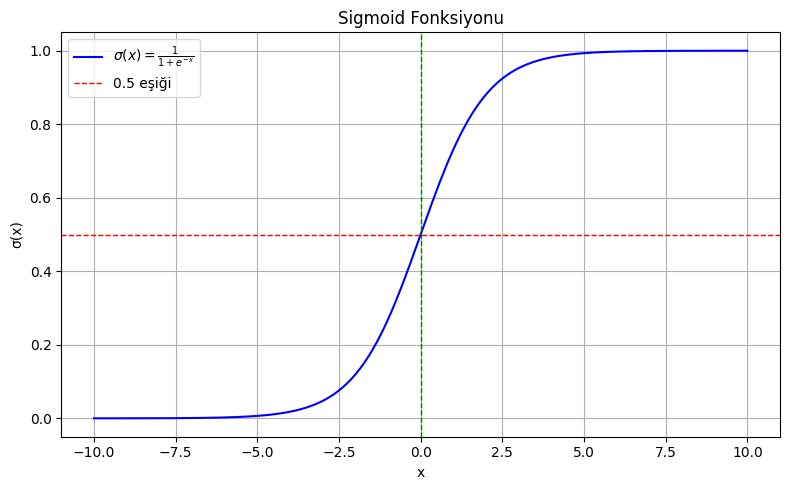

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid fonksiyonu tanımı
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# x değerleri
x = np.linspace(-10, 10, 200)
y = sigmoid(x)

# Grafiği çiz
plt.figure(figsize=(8, 5))
plt.plot(x, y, label=r'$\sigma(x) = \frac{1}{1 + e^{-x}}$', color='blue')
plt.axhline(0.5, color='red', linestyle='--', linewidth=1, label='0.5 eşiği')
plt.axvline(0, color='green', linestyle='--', linewidth=1)
plt.title("Sigmoid Fonksiyonu")
plt.xlabel("x")
plt.ylabel("σ(x)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
# Titanic verisini kullanarak Lojistik Regresyon kullanalım.

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Titanic veri setini yükleyelim
df = sns.load_dataset("titanic")

# Gerekli sütunları seçelim, eksik verileri temizleyelim
df_model = df[ ["survived", "sex", "age", "fare", "pclass"]].dropna()

# Cinsiyeti sayısal değere çevirelim.
df_model["sex"] = df_model["sex"].map({"male": 0, "female": 1})
## df_model["sex"] = [0 if x == "male" else 1 for x in df_model["sex"]] # list comprehension kullanarak nasıl yazarım?

# Özellikler ve hedef değişken
X = df_model[["sex", "age", "fare", "pclass"]] #farklı özelliklerin hayatta kalma durumuna nasıl etki ettiğini görelim.
#X = df_model[["age"]]
y = df_model["survived"]

# Eğitim ve test kümelerine ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lojistik Regresyon modeli oluşturalım ve eğitelim
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Tahmin yapalım
y_pred = model.predict(X_test)

print("Doğruluk Oranı:", accuracy_score(y_test, y_pred))
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred))


Doğruluk Oranı: 0.7552447552447552

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.81      0.78      0.80        87
           1       0.68      0.71      0.70        56

    accuracy                           0.76       143
   macro avg       0.74      0.75      0.75       143
weighted avg       0.76      0.76      0.76       143



## 2. Karar Ağaçları - (Decision Trees)

Veriyi, bir dizi "evet/hayır" sorusuna (kurallara) göre homojen alt pruplara bölmektir. 

* **Kök Düğüm (Root Node):** Ağacın en tepesindeki ilk düğümdür. Tüm veri setini temsil eder ve ilk sorunun sorulduğu yerdir. ("Hava Durumu?)
* **Dallar (Branches):** Bir düğümden çıkan yollardır. Her dal, bir sorunun cevabını (örneğin, "Güneşli", "Bulutlu", "Yağmurlu") temsil eder.
* **İç Düğümler / Karar Düğümleri (Internal/Decision Nodes):** Kök düğüm gibi, bir soru sorarak veriyi alt gruplara ayıran düğümlerdir. ("Nem?" ve "Rüzgar?")
* **Yaprak Düğümler / Terminal Düğümler (Leaf/Terminal Nodes):** Ağacın en altındaki, artık bölünmeyen düğümlerdir. Bu düğümler, nihai kararı veya tahmini içerir. ("Basket Oyna" veya "Basket Oynama")

**Algoritma Nasıl Çalışır? "En İyi" Soruyu Bulmak**

Amacımız, her adımda sorularacak olan **"en iyi"** soruyu nasıl bulunduğunda yatar. "En iyi" soru, veri setini en **saf (pure)** alt gruplara ayıran sorudur. "Saf" demek, oluşturulan alt grupların mümkün olduğunca tek bir sınıfa ("Basket Oyna" veya "Basket Oynama") ait olması demektir.
<br></br>
En iyi soruyu bulmak için iki temel metrik kullanılır:
1. **Gini Katsayısı (Gini Impurity)**
2. **Entropi ve Bilgi Kazancı (Entropy and Information Gain)**

Her ikisinin de amacı aynıdır. Bir düğümdeki karmaşıklığı veya belirsizliği ölçmektir. Değer ne kadar düşükse, düğüm o kadar "saftır".

**1. Gini İndeksi (Gini Index)**

Bir düğümdeki rastgele seçilen bir elemanın, o düğümdeki sınıf dağılımına göre **yanlış sınıflandırılma olasılığını** ölçer.

Denklem:

$$
Gini = 1 - \sum _{i=1}^{C} (p_i)^2
$$

* $C:$ sınıf sayısıdır.
* $p_i:$ o düğümdeki i.sınıfa ait elemanların oranıdır.

**Örnek:** Bir düğümde 5 "Seç" ve 5 "Seçme" kararı varsa:
* $p_{sec} = 5/10 = 0.5$
* $p_{secme} = 5/10 = 0.5$
* $Gini = 1 - ((0.5)^2 + (0.5)^2) = 1 - (0.25 + 0.25) = 0.5$ (Maksimum belirsizlik)

Eğer düğümde 9 "Seç" ve 1 "Seçme" olsaydı, Gini katsayısı çok daha düşük çıkardı, bu da düğümün daha **"saf"** olduğunu gösterir. Algoritma, dallanma sonraswı oluşacak düğümlerin ağırlıklı Gini ortalamasını en çok düşüren soruyu seçer.

<br></br>
**2. Entropi ve Bilgi Kazancı (Entropy & Information Gain)**

**Entropi,** bilgi teorisinden gelen bir kavramdır ve bir düğümdeki **belirsizliğin veya düzensizliğin** ölçüsüdür.

Denklem:

$$
E(S) = - \sum _{i=1}^{C}{p_ilog_2(p_i)}
$$

* $p_i:$ i.sınıfa ait elemanların oranıdır.
* Entropi değeri 0 (tamamen saf bir düğüm) ile 1 (sınıflar eşit dağılmış, maksimum belirsizlik) arasında değişir.

<br></br>
**Bilgi Kazancı (Information Gain)** ise, bir özelliğe göre dallanma yapmanın Entropi'yi ne kadar azalttığını ölçer. Algoritma, her zaman **Bilge Kazancı en yüksek olan** soruyu (özelliği) seçer.

Denklem:

$$
Bilgi \space Kazancı(S,A) = E(S) - \sum _{v \in Değerler(A)}{ \frac{|S_v|}{|S|} E(S_v)}
$$

* $E(S):$ ana düğümün entropisidir.
* $A:$ dallanma yapılacak özellik. (örn: Hava Durumu).
* $S_v:$ özelliğin $v$ değerine sahip alt kümesidir. (örn: Hava Durumunun "Güneşli" olduğu alt veri seti).
* $\frac{|S_v|}{|S|}: S_v$ alt kümesinin büyüklüğünün (örneğin, kaç örnek içerdiğinin) veri kümesinin tamamına (S) oranıdır. Bu, her alt kümenin toplam veri kümesine olan oranını temsil eder.
* $E(S_v):$ A özelliği $v$ değerini aldığında **alt kümenin entropisidir.** Yani, $S_v$ alt kümesindeki sınıf dağılımı ne kadar belirsizse, $E(S_v)$ o kadar yüksek olacaktır.

**Ağacın Oluşturulma Süreci**

Algoritma özyinelemeli (recursive) bir şekilde çalışır:

1. **Başla:** Tüm veri seti kök düğümdedir.
2. **En İyi Bölmeyi Bul:** Tüm özellikler (hava durumu, nem, rüzgar vs.) için potansiyel tüm bölme noktaları denenir. Gini veya Bilgi Kazancı metriklerini kullanarak en iyi bölmeyi (en saf alt grupları oluşturan soruyu) bul
3. **Dallan:** Bu en iyi soruya göre bir iç düğüm oluştur ve veriyi bu sorunun cevaplarına göre dallara ayırarak alt gruplar oluştur.
4. **Tekrarla:** Oluşturulan her alt grup (yeni düğüm) için 2. ve 3. adımları tekrarla.
5. **Dur:** Aşağıdaki durumlardan biri gerçekleşene kadar devam et:
   * Bir düğüm tamamen saf hale geldiğinde (içindeki tüm veriler aynı sınıfa ait).
   * Önceden belirlenmiş bir ağaç derinliğine ulaşıldığında.
   * Bir düğümdeki veri sayısı, bölünmek için belirlenen minimum sayının altına düştüğünde.
   * Daha fazla dallanma, bilgi kazancını anlamlı ölçüde artırmadığında.

**Aşırı Öğrenme (Overfitting) ve Budama (Pruning)**

Karar Ağaçları'nın en büyük risklerinden biri **aşırı öğrenmedir (overfitting).** Bu, ağacın eğitim verisini o kadar detaylı ve karmaşık bir şekilde öğrenmesidir ki, verideki gürültüyü bile ezberler. Sonuç olarak, eğitim verisinde mükemmel çalışırken, daha önce görmediği yeni verilerde kötü performans gösterir.

**Çözüm: Budama (Pruning)**

Aşırı öğrenmeyi engellemek için ağacın gereksiz dalları kesilir. İki tür budama vardır:

1. **Ön-Budama (Pre-pruning):** Ağacın büyümesini baştan kısıtlamaktır. Örneğin, maksimum derinlik belirlemek veya bir düğümün bölünebilmesi için minimum veri sayısı şartı koymak gibi.
2. **Sonradan-Budama (Post-pruning):** Önce ağacın tamamen büyümesine izin verilir, sonra da ağacın genelleme performansını artırmayan (hatta düşüren) dallar kesilir.


Avantajlar:
* **Yorumlanabilirlik:** Kuralları ağaç yapısıyla görselleştirmek kolaydır.
* **Az Ön İşlem Gerektirir:** Kategorik/Nümerik verilerle doğrudan çalışabilir.
* **Non-lineer İlişkileri Yakalar:** Doğrusal olmayan sınırlar çizebilir.
* **Ölçeklenebilirlik:** Büyük veri setlerine uyum sağlayabilir.

Dezavantahlar:
* **Aşırı Uyum (Overfitting) Riskli:** Derin ağaçlar eğitim verisini ezberler.
* **Küçük Değişimlere Duyarlı:** Verideki küçük değişiklikler ağaç yapısını bozabilir.
* **Global Optimumu Garanti Etmez:** Açgözlü (greedy) yaklaşım kullanır.

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
Eğitim seti boyutu: 712 örnek
Test seti boyutu: 179 örnek
Modelin doğruluk oranı: 80.45%


C:\Users\local-admin\AppData\Local\Temp\ipykernel_8824\3509173177.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(age_median, inplace=True) # boş olan değerleri doldurdum.


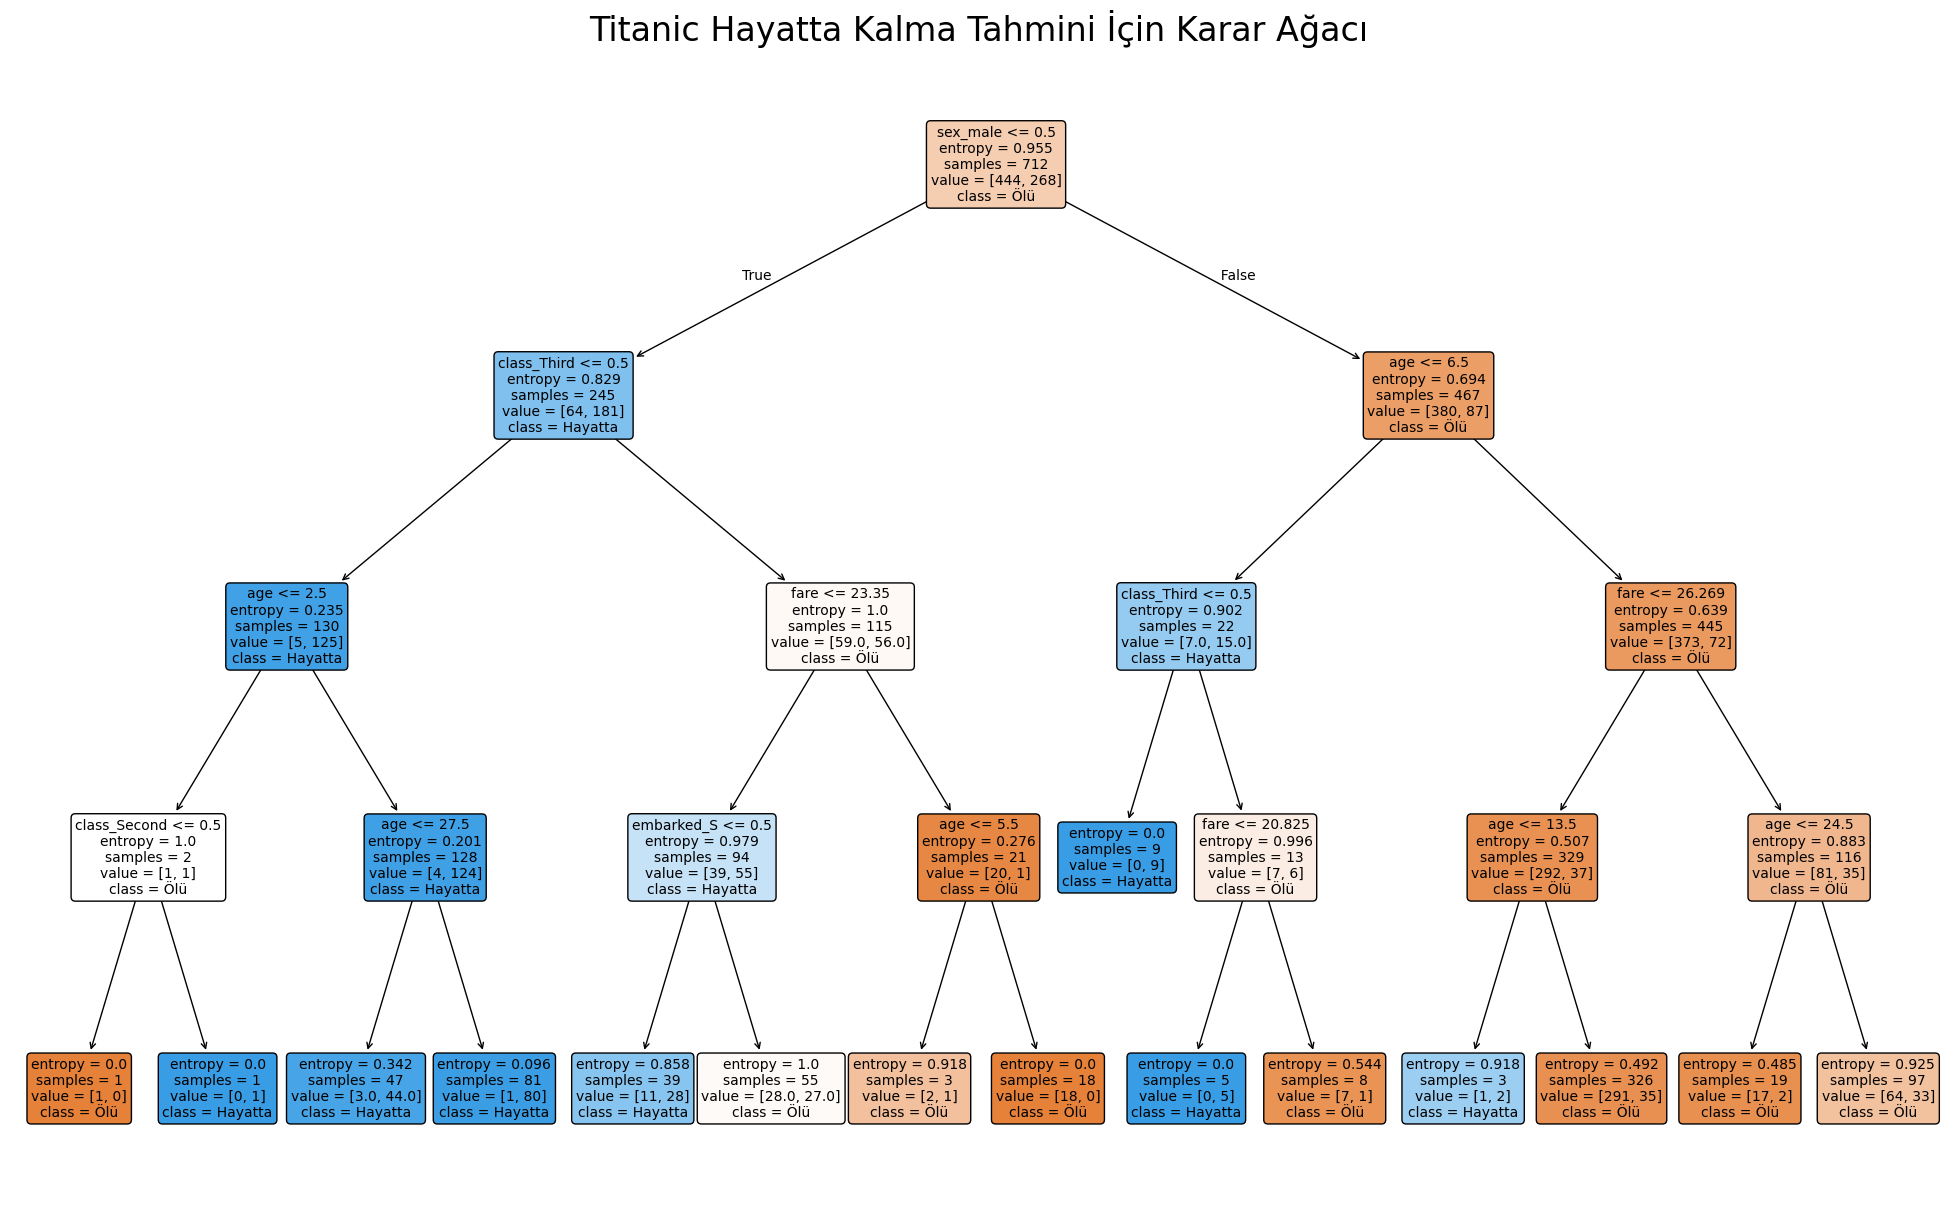

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = sns.load_dataset("titanic")

print(df.isnull().sum()) # kaç tane boş değer olduğuna bakıyorum.

# age sütunundaki eksik değerleri, doldurma kararı aldım.
age_median = df["age"].median() # ortanca değeri aldık.
df["age"].fillna(age_median, inplace=True) # boş olan değerleri doldurdum.
#df.fillna({"age": age_median}, inplace=True) # Yukarıdaki kod ilerleyen zamanlarda kullanılmayacak. Buna göre yaz.

# embarked ve embark_town sütunlarındaki eksik değerleri en sık tekrar eden değer (mod) ile dolduralım.
embarked_mode = df["embarked"].mode()[0]
embarked_town_mode = df["embark_town"].mode()[0]
df.fillna({"embarked": embarked_mode, "embark_town": embarked_town_mode}, inplace=True)

# deck sütununda çok fazla eksik veri olduğu için bu sütunu modelden çıkarmak en mantıklı bir davranış olacağını düşündüm.
df.drop("deck", axis=1, inplace=True) # axis=1 sütun değerlerinde işlem yapar, axis=0 satır değerlerinde işlem yapar.

# Kategorik değerleri sayısal değere çevirmem gerekir. 
# Karar ağacı modelleri "male", "female" gibi metinleri işleyemiyordu. Bu yüzden get_dummies kullanabilirim.
df = pd.get_dummies(df, columns=["sex", "embarked", "class"], drop_first=True)

# Model için gereksiz olan diğer sütunları da dataframe'den çıkartalım.
df.drop(["who", "adult_male", "alive", "embark_town"], axis=1, inplace=True)


################################################################################

# Hedef değişkenimizi belirleyelim.
y = df["survived"]

# Özelliklerimiz ise "survived" ve orijinal metin sütunları dışındaki her şey
X = df.drop(["survived", "pclass", "sibsp", "parch"], axis=1)

# Verimizi %80 eğitim, %20 test olarak ayıracağım.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Eğitim seti boyutu: {X_train.shape[0]} örnek")
print(f"Test seti boyutu: {X_test.shape[0]} örnek")

# Karar Ağacı modelini oluşaracağım.
# max boyut 4 yeterli gibi
DTC_model = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=42)

# Modeli eğitme aşaması
DTC_model.fit(X_train, y_train)

# Tahmin yapma
y_pred = DTC_model.predict(X_test)

# Model doğruluğu
accuracy = accuracy_score(y_test, y_pred)
print(f"Modelin doğruluk oranı: {accuracy * 100:.2f}%")

# Görselleştirmek istersem...
plt.figure(figsize=(25,15))
plot_tree(DTC_model,
          feature_names=X.columns.tolist(), #X'in sütunlarındaki özellik isimleri alır.
          class_names=["Ölü","Hayatta"], # Sınıf isimlerini belirtir
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Titanic Hayatta Kalma Tahmini İçin Karar Ağacı", fontsize=24)
plt.show()


* **sex_male <= 0.5** : Bu düğümün sorduğu soru. pd.get_dummies kullandığım için sex sütunu sex_male oldu. Değeri 1 ise erkek, 0 ise kadın. "Erkek mi, kadın mı?" sorusu sorar. 
* **entropy** : Bu düğümdeki veri örneklerinin ne kadar "karışık" olduğunun ölçüsüdür. 0 mükemmel saflık (herkes aynı sınıfta), 1 ise maksimum karışıklık (sınıflar eşit değılmış) demektir.
* **samples = 712** : Bu düğüme ulaşan toplam eğitim verisi örnek sayısı. Yani model eğitilirken 712 kişi bu düğümden geçti.
* **value = [439, 273]** : En kritik bilginin olduğu yer. class_name=["Ölü", "Hayatta"] sıralamasına göre okunur.
  * Bu düğümdeki 712 kişiden **439** tanesi 0.sınıfa ait (yani ölü)
  * Bu düğümdeki 712 kişiden **273** tanesi 1.sınıfa ait (yani hayatta)
* **class = Ölü** : Ölü etiketini de value dizisine bakarak karar verir. Hangi sayı **[439, 273]** daha büyükse onun etiketini alır koyar.

## 3. Rastgele Orman - (Random Forest)

Bir **topluluk öğrenmesi (ensemble learning)** yöntemidir. Temel fikri, çok sayıda "zayıf" veya "orta karar" öğreniciyi (karar ağaçları) bir araya getirerek, tek bir "güçlü" öğrenici oluşturmaktır. Nihai karar, tüm ağaçların yaptığı tahminlerin birleştirilmesiyle verilir.

Örneğin bir hastalığa teşhis koymaya çalışan bir doktor olsun. Bu doktor çok zeki olabilir ama tecrübeleri ve önyargılarıyla sınırlıdır. Belki de nadir bir durumu her zaman aynı hastalığa bağlama eğilimindedir. Bunu da aşırı öğrenme gibi düşünebiliriz. **Bir sürü farklı Karar Ağacı'ndan oluşan yapıda Rastgele Orman'dır.**

* **Sınıflandırma için:** En çok oyu alan sınıf seçilir (Oylama-Voting)
* **Regresyon için:** Tüm ağaçların tahminlerinin ortalaması alınır. (Ortalama Alma - Averaging)


**1. Rastgele Örneklem Seçimi: Bagging (Bootstrap Aggregating)**

* **Bootstrap:** Orijinal eğitim veri setimizden (diyelim ki 1000 örnek var), **yerine koyarak (with replacement)** rastgele yeni alt veri setleri oluşturulur. Bu ne demek? 1000 örnek içinden rastgele bir örnek seçilir, not edilir ve sonra **geri konur.** Bu işlem 1000 defa tekrarlanır. Sonuçta oluşan yeni 1000 örneklik veri setinde, bazı orijinal örnekler birden fazla kez yer alırken, bazıları hiç yer almayabilir.
* **Aggregating:** Algoritma, her bir "bootstrap" edilmiş alt veri seti için ayrı bir Karar Ağacı eğitir. Örneğin, 100 ağaçlık bir orman kuruyorsak, 100 farklı bootstrap veri seti oluştururuz ve her birinde bir ağaç eğitiriz.

**2. Rastgele Özellik Seçimi (Feature Randomness)**

Tek bir Karar Ağacı, bir düğümü bölmek için **tüm özellikleri** tarar ve en iyi ayrımı sağlayanını (en yüksek bilgi kazancı vereni) seçer. Eğer veri setinde çok baskın bir özellik varsa (örneğin Titanic'te cinsiyet), neredeyse tüm ağaçlar ilk olarak bu özelliği seçecektir. Bu durum, ağaçların birbirine çok benzemesine ve konseyin çeşitliliğinin azalmasına neden olur.

Bunu engellemek için:
1. Tüm özellikleri (pclass, age, sex_male, vs.) düşünmek yerine,
2. Bunların içinden **rastgele bir alt kümesini** (örneğin toplam 10 özellikten rastgele 3 tanesini) seçer.
3. Ve en iyi bölünmeyi **sadece bu rastgele seçilmiş alt küme içinde** arar.

**Avantajları:**
* **Yüksek Doğruluk:** Genellikle kutudan çıktığı haliyle (out-of-the-box) en iyi performansı veren algoritmalardan biridir.
* **Aşırı Öğrenmeye Karşı Çok Dirençli:** En büyük gücüdür. Çok sayıda ağacın ortalaması alındığı için tek bir ağacın ezber yapması engellenir.
* **Özellik Ölçeklendirme Gerektirmez:** Karar Ağacı tabanlı olduğu için normalizasyon/Standardizasyon gibi ön işlemlere ihtiyaç duymaz.
* **Özellik Önemini (Feature Importance) Hesaplayabilir:** Bir özelliğin modelin doğruluğuna ne kadar katkı sağladığını ölçebilir.

**Dezavantajları:**
* **Kara Kutu (Black Box) Modeli:** Tek bir Karar Ağacı'nı yorumlamak çok kolayken, 500 ağacın toplu olarak nasıl bir karara vardığını tam olarak anlamak imkansızdır. Bu yüzden yorumlanabilirlik düşüktür.
* **Hesaplama Maliyeti Yüksek:** Yüzlerde (bazen binlerce) ağaç eğitmek, tek bir ağaç eğitmekten çok daha fazla zaman ve bellek gerektirir.
* **Büyük Veri Setlerinde Yavaş Olabilir:** Hem eğitim hem de tahmin süresi, ağaç sayısı arttıkça uzar.

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
survived        0
age             0
sibsp           0
parch           0
fare            0
alone           0
sex_male        0
embarked_Q      0
embarked_S      0
class_Second    0
class_Third     0
dtype: int64
Eğitim seti boyutu: 712 örnek
Test seti boyutu: 179 örnek
Modelin doğruluk oranı: 82.12%


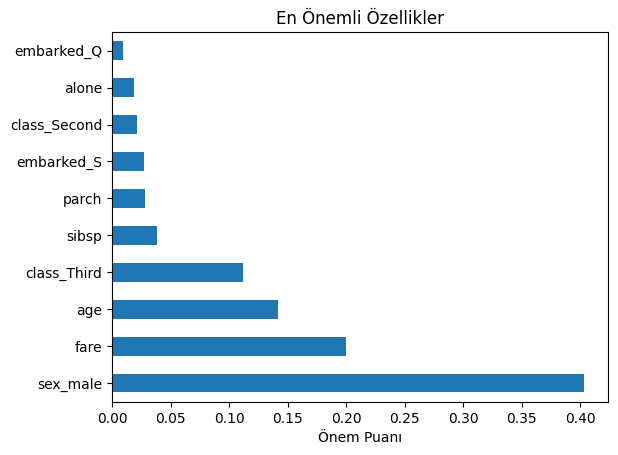

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = sns.load_dataset("titanic")

print(df.isnull().sum()) # kaç tane boş değer olduğuna bakıyorum.

# age sütunundaki eksik değerleri, doldurma kararı aldım.
age_median = df["age"].median() # ortanca değeri aldık.
#df["age"].fillna(age_median, inplace=True) # boş olan değerleri doldurdum.
df.fillna({"age": age_median}, inplace=True) # Yukarıdaki kod ilerleyen zamanlarda kullanılmayacak. Buna göre yaz.

# embarked ve embark_town sütunlarındaki eksik değerleri en sık tekrar eden değer (mod) ile dolduralım.
embarked_mode = df["embarked"].mode()[0]
embarked_town_mode = df["embark_town"].mode()[0]
df.fillna({"embarked": embarked_mode, "embark_town": embarked_town_mode}, inplace=True)

# deck sütununda çok fazla eksik veri olduğu için bu sütunu modelden çıkarmak en mantıklı bir davranış olacağını düşündüm.
df.drop("deck", axis=1, inplace=True) # axis=1 sütun değerlerinde işlem yapar, axis=0 satır değerlerinde işlem yapar.

# Kategorik değerleri sayısal değere çevirmem gerekir. 
# Karar ağacı modelleri "male", "female" gibi metinleri işleyemiyordu. Bu yüzden get_dummies kullanabilirim.
df = pd.get_dummies(df, columns=["sex", "embarked", "class"], drop_first=True)

# Model için gereksiz olan diğer sütunları da dataframe'den çıkartalım.
df.drop(["who", "adult_male", "alive", "embark_town", "pclass"], axis=1, inplace=True)

print(df.isnull().sum()) # kaç tane boş değer olduğuna bakıyorum.

################################################################################

# Hedef değişkenimizi belirleyelim.
y = df["survived"]

# Özelliklerimiz ise "survived" dışındaki her şey
X = df.drop(["survived"], axis=1)

# Verimizi %80 eğitim, %20 test olarak ayıracağım.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Eğitim seti boyutu: {X_train.shape[0]} örnek")
print(f"Test seti boyutu: {X_test.shape[0]} örnek")

# Rastgele Orman modelini oluşaracağım.
# max boyut 4 yeterli gibi
rf_model = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42, min_samples_leaf=3)
# n_estimators: Ormandaki ağaç sayısı. 100 başlangıç değeridir.
# max_depth: Her bir ağacın maksimum derinliği. Aşırı öğrenmeyi kontrol etmek için kullanabilirim.
# random_state: Sonuçların tekrarlanabilir olması için kullanıyorum.


# Modeli eğitme aşaması
rf_model.fit(X_train, y_train)

# Tahmin yapma
y_pred = rf_model.predict(X_test)

# Model doğruluğu
accuracy = accuracy_score(y_test, y_pred)
print(f"Modelin doğruluk oranı: {accuracy * 100:.2f}%")


# Görselleştirmek istersem...
feature_importances= pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind="barh") # en önemli 10 özelliği çizelim
plt.title("En Önemli Özellikler")
plt.xlabel("Önem Puanı")
plt.show()
